<a href="https://colab.research.google.com/github/deenyse/VSB_ZSU/blob/main/Copy_of_UASS_4_14_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detekce komunit

> Cílem cvičení je porovnat algoritmy pro detekci komunit, jak se liší výsledky vzhledem k použitému algoritmu a typu sítě. Vzhledem k tomu, že Gephi dokáže počítat pouze modularitu, tj. pro detekci komunit je dostupný pouze Louvain algoritmus, použijeme pro detekci komunit networkx, který má naimplementované i další algoritmy.


## Část 1: Detekce komunit

1. Sítě

  - Použíjte sítě z minulého cvičení, tj. síť delfínů a LesMiserables

2. Vyberte si Louvain algoritmus a alespoň 2 další algoritmy pro predikci komunit z networkx:
      - [Seznam algoritmů](https://networkx.org/documentation/stable/reference/algorithms/community.html)
3. Detekce komunit:
  - Na zvolené sítě aplikujte detekci komunit
  - Vstupem bývá objekt `nx.Graph` a výstupem z Networkx bývá seznam množin (`[{vrcholy pro komunitu 1}, {vrcholy pro komunitu 2},...]`), kde každá množina je jedna komunita a její prvky jsou identifikátory vrcholů ze sítě
  - Po predikci obarvěte každou komunitu, resp. její vrcholy jinou barvou
    - Pro obarvení je nutné vytvořit seznam barev, kde index vrcholu v seznamu vrcholů (`G.nodes`) odpovídá barvě na daném indexu v seznamu barev ([])
    - Pro Gephi nutný atribut `viz` - `vrchol["viz"]["color"] = {"a":0, "r": 0, "g": 0, "b": 0}`

In [ ]:
import random # https://docs.python.org/3/library/random.html
import networkx as nx
G : nx.Graph = nx.read_edgelist("nazev.csv", delimiter=';',nodetype=int)
communities = nx.community.louvain_communities... # TODO - doplnit kod pro ziskani komunit - https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities
# Vystup [{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]

community_colors = []
for _ in communities:
    community_colors.append((...)) # TODO: doplnte generovani nahodnych barev ve formatu (r,g,b) v rozmezi 0 - 255 - https://docs.python.org/3/library/random.html


# TODO - nastavte barvy podle prislusnosti do komunit
for c_idx, community in enumerate(communities): # c_idx - index komunity, community - mnozina vrcholu
  r,g,b = ... # TODO - ziskat barvu komunity
  G.nodes[N]['color'] = (r/255, g/255, b/255)
  # G.node[N]['viz'] = {'r': 0, 'g': 0, 'b': 0, 'a': 1.0}

node_colors = [G.nodes[n]['color'] for n in G.nodes()]




## Část 2: Vizualizace v networkx a Gephi
1. Exportujte barevnou síť do Gephi
2. Zobrazte barevnou síť v Google Colabu
  - Nejprve použíjte `spring_layout` rozložení - [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html), který rozloží vrcholy v prostoru a vrátí slovník pozic pro každý vrchol
  - Vykreslete síť, doplňte jako parametr slovník s pozicemi a barvy vrcholů - [draw_networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)


Zpracovávám síť 'Dolphins' algoritmem 'louvain'...


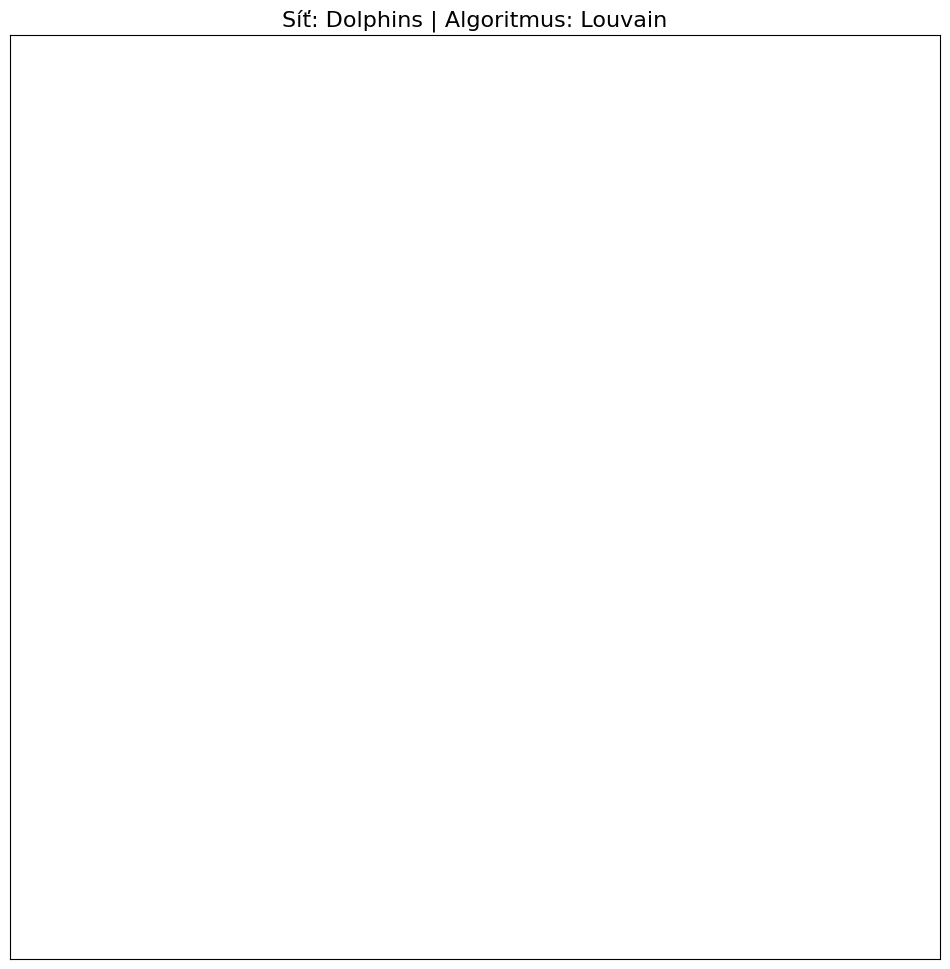

Síť byla exportována do souboru: Dolphins_louvain.gexf

Zpracovávám síť 'Dolphins' algoritmem 'greedy_modularity'...


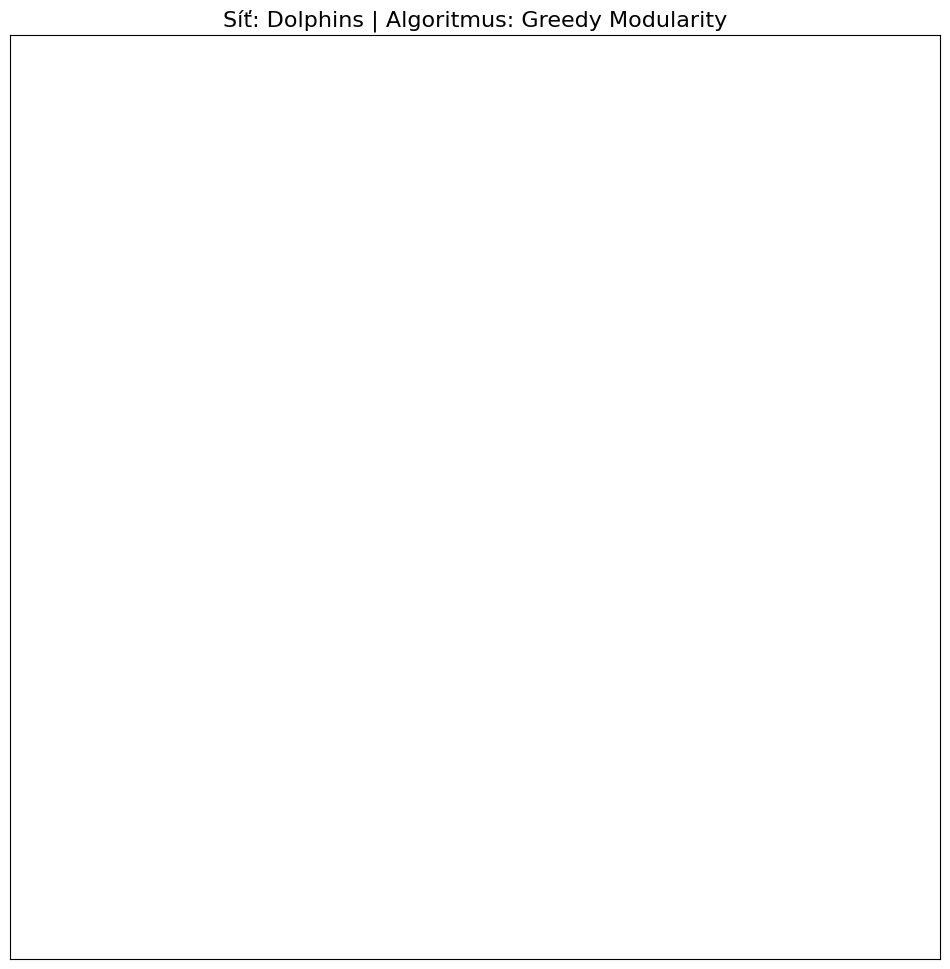

Síť byla exportována do souboru: Dolphins_greedy_modularity.gexf

Zpracovávám síť 'Dolphins' algoritmem 'girvan_newman'...


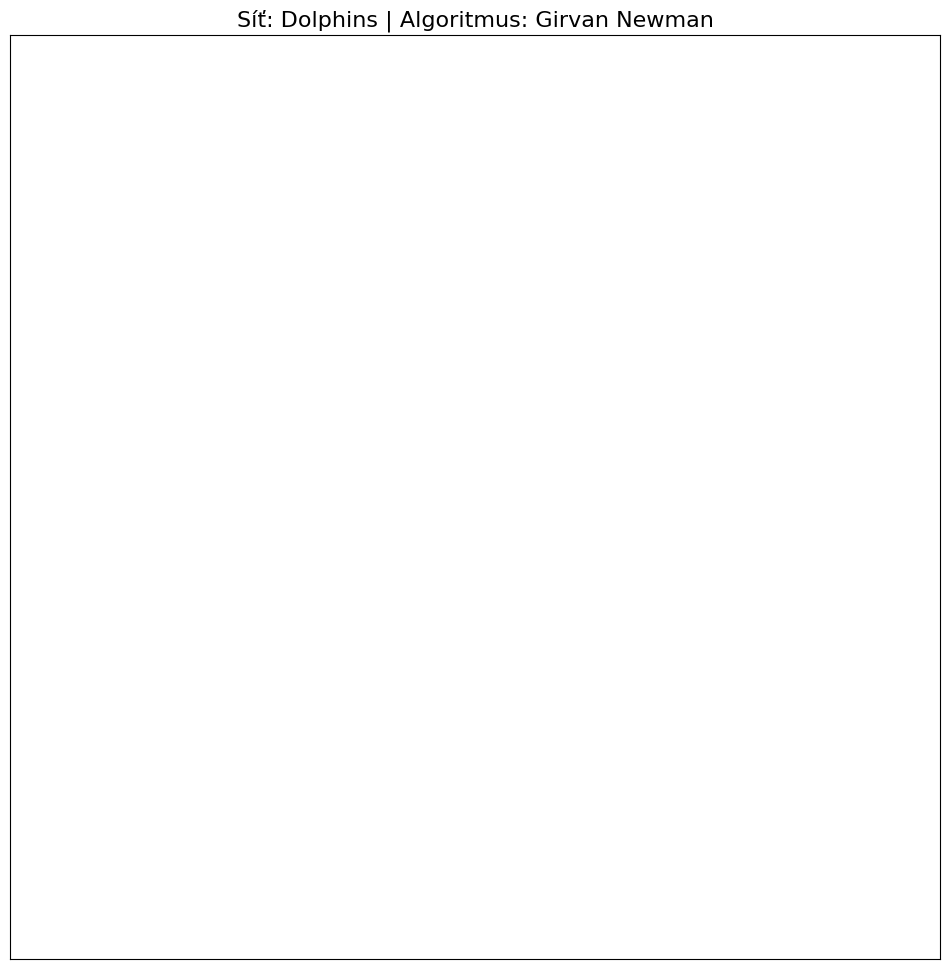

Síť byla exportována do souboru: Dolphins_girvan_newman.gexf

Zpracovávám síť 'LesMiserables' algoritmem 'louvain'...


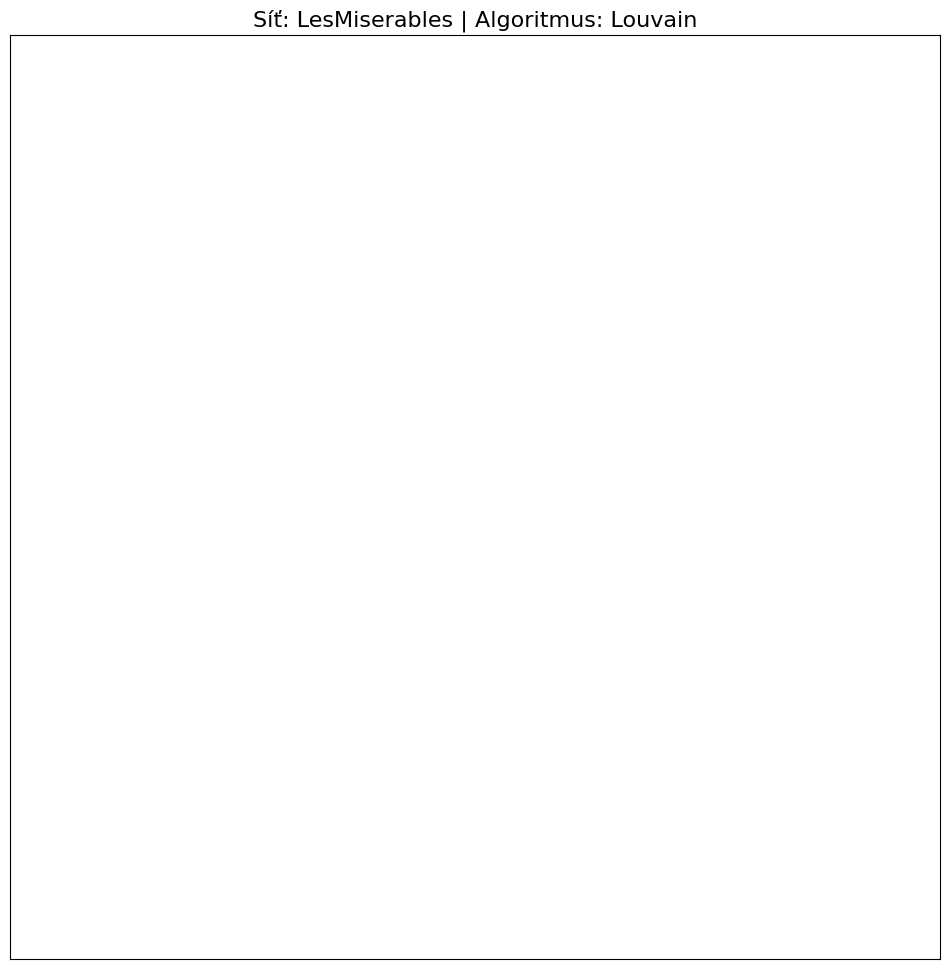

Síť byla exportována do souboru: LesMiserables_louvain.gexf

Zpracovávám síť 'LesMiserables' algoritmem 'greedy_modularity'...


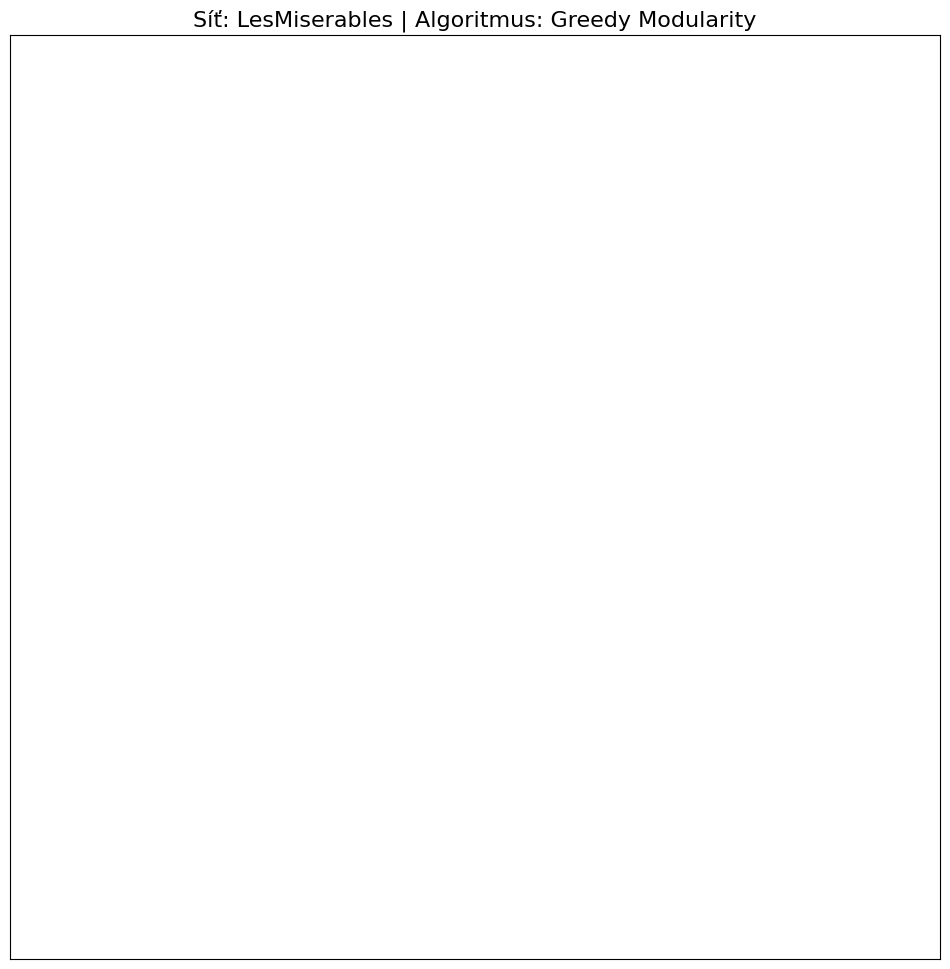

Síť byla exportována do souboru: LesMiserables_greedy_modularity.gexf

Zpracovávám síť 'LesMiserables' algoritmem 'girvan_newman'...


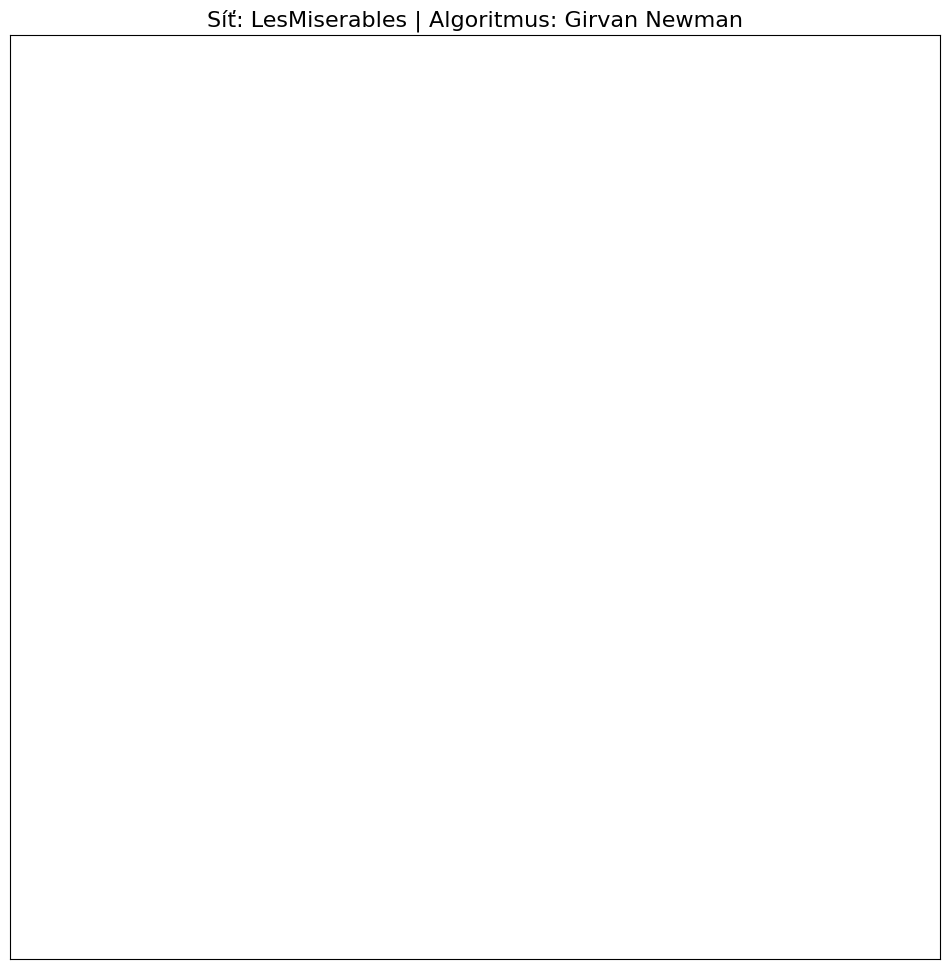

Síť byla exportována do souboru: LesMiserables_girvan_newman.gexf



In [3]:
# Spring layout
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
# TODO - ziskat pozice vrcholu

# Vykreslit sit s barvami vrcholu a pozicemi ze spring layoutu
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx
# TODO - vykreslit sit s pozicemi a barvami vrcholu


import networkx as nx
import matplotlib.pyplot as plt
import random

def process_network(G, graph_name):
    """
    Tato funkce aplikuje tři algoritmy detekce komunit na daný graf,
    vizualizuje výsledky a exportuje je do GEXF pro Gephi.
    """
    # Seznam algoritmů, které budeme testovat
    # 1. Louvain Method
    # 2. Greedy Modularity Maximization
    # 3. Girvan-Newman
    algorithms = {
        "louvain": nx.community.louvain_communities,
        "greedy_modularity": nx.community.greedy_modularity_communities,
        "girvan_newman": nx.community.girvan_newman
    }

    for alg_name, algorithm_func in algorithms.items():
        print(f"Zpracovávám síť '{graph_name}' algoritmem '{alg_name}'...")

        G_copy = G.copy()

        if alg_name == "girvan_newman":
            communities_generator = algorithm_func(G_copy)
            communities = tuple(sorted(c) for c in next(communities_generator))
        else:
            communities = algorithm_func(G_copy)

        community_colors_rgb = []
        for _ in communities:
            r = random.randint(0, 255)
            g = random.randint(0, 255)
            b = random.randint(0, 255)
            community_colors_rgb.append((r, g, b))

        node_colors_for_nx = []
        node_to_community = {}
        for c_idx, community in enumerate(communities):
            r, g, b = community_colors_rgb[c_idx]
            for node in community:
                G_copy.nodes[node]['viz'] = {'color': {'r': r, 'g': g, 'b': b, 'a': 1.0}}
                node_to_community[node] = c_idx

        for node in G_copy.nodes():
            c_idx = node_to_community[node]
            r, g, b = community_colors_rgb[c_idx]
            node_colors_for_nx.append((r/255, g/255, b/255))

        plt.figure(figsize=(12, 12))
        pos = nx.spring_layout(G_copy, seed=42)
        nx.draw_networkx(G_copy, pos, node_color=node_colors_for_nx, with_labels=True, node_size=250, font_size=8)
        plt.title(f"Síť: {graph_name} | Algoritmus: {alg_name.replace('_', ' ').title()}", size=16)
        plt.show()

        file_path = f"{graph_name}_{alg_name}.gexf"
        nx.write_gexf(G_copy, file_path)
        print(f"Síť byla exportována do souboru: {file_path}\n")


dolphins_graph = nx.read_edgelist("Dolphins.csv", ";", nodetype=str)
les_miserables_graph = nx.read_edgelist("Les_Miserables.csv", ";", nodetype=str)

process_network(dolphins_graph, "Dolphins")
process_network(les_miserables_graph, "LesMiserables")


## Část 3: Porovnejte výsledky
1. Jak se liší rozložení po použití ForceAtlas2 a spring layout v networkx a které rozložení je lepší?
2. Který algoritmus vypadá, že nejlépe rozdělil síť do komunit?
3. Jak zhruba fungují zvolené algoritmy?
4. Jak by šlo upravit rozdělení vrcholů, aby rozdělení lépe odpovídalo pomyslným komunitám?
5. Je každý vrchol ze sítě v nějaké komunitě?
5. Jak by šlo vizualizovat komunity v síti jinak, než obarevením vrcholů?